# Problem 1

1. Fix s = 1 and let ε ∼ N (0, s^2 ·I_n ). 
2. Determine E[ ||ε|| ] as a function of s^2 and n. 

You can do this however you like (besides looking it up): analytically by deriving the answer, or estimating numerically using a computer for various values of the variables and plotting the result as a heatmap or multiple line plots. 

Indeed, I encourage you to try both, even if you already know the answer. In the numerical case, think about the confidence interval of your computation and try to justify how certain you are of the answer for each n.

### Imports And Global Constants

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

N_SAMPLES=10000

### Import utility module

In [11]:
import sci_kit_learn_utils.utils as scu

### Calculate Distance - Store as tuple(dimension,variance,distance)

In [7]:
#  Look at dimensions between 2 and 10
dimension=list(range(2,11))
deviation_list=np.linspace(0,2,num=21,endpoint=True)[1:]
list_of_tuples=list()

#  Container for all the dimensions
dim_d=dict()

for d in dimension:
    #  Container for expectation of N_SAMPLES for single variance
    ex_d=dict()
    for s in deviation_list:
        #  Draw N_SAMPLES
        d_list=[scu.dist_to_origin(scu.draw_normal_sample(d,s), d) for i in range(N_SAMPLES)]
        ex_d[s]=abs(np.sum(d_list)/float(N_SAMPLES))
    dim_d[d] = ex_d
    
for dk, dv in dim_d.items():
    print(f'DIMENSION : {dk}')
    for k,v in dv.items():
        print(f'  Var: {k**2:0.3f} Dist: {v:0.4f}')
        list_of_tuples.append((dk,k**2,v))

DIMENSION : 2
  Var: 0.010 Dist: 0.1870
  Var: 0.040 Dist: 0.3775
  Var: 0.090 Dist: 0.5606
  Var: 0.160 Dist: 0.7521
  Var: 0.250 Dist: 0.9326
  Var: 0.360 Dist: 1.1242
  Var: 0.490 Dist: 1.3202
  Var: 0.640 Dist: 1.5083
  Var: 0.810 Dist: 1.6948
  Var: 1.000 Dist: 1.8829
  Var: 1.210 Dist: 2.0598
  Var: 1.440 Dist: 2.2534
  Var: 1.690 Dist: 2.4418
  Var: 1.960 Dist: 2.6402
  Var: 2.250 Dist: 2.8145
  Var: 2.560 Dist: 2.9964
  Var: 2.890 Dist: 3.1939
  Var: 3.240 Dist: 3.3741
  Var: 3.610 Dist: 3.5939
  Var: 4.000 Dist: 3.7823
DIMENSION : 3
  Var: 0.010 Dist: 0.2927
  Var: 0.040 Dist: 0.5813
  Var: 0.090 Dist: 0.8756
  Var: 0.160 Dist: 1.1658
  Var: 0.250 Dist: 1.4564
  Var: 0.360 Dist: 1.7512
  Var: 0.490 Dist: 2.0400
  Var: 0.640 Dist: 2.3321
  Var: 0.810 Dist: 2.6195
  Var: 1.000 Dist: 2.9251
  Var: 1.210 Dist: 3.2109
  Var: 1.440 Dist: 3.5020
  Var: 1.690 Dist: 3.7920
  Var: 1.960 Dist: 4.0855
  Var: 2.250 Dist: 4.3911
  Var: 2.560 Dist: 4.6606
  Var: 2.890 Dist: 4.9683
  Var: 3.2

### Convert Tuple to Pandas DataFrame

In [12]:
df = pd.DataFrame(list_of_tuples, columns =['dimension', 'variance', 'distance'])

### Plot DataFrame as HeatMap in Seaborn

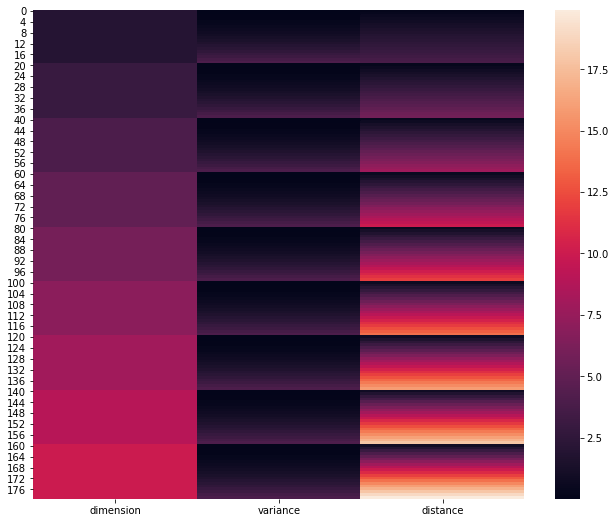

In [10]:
fig, ax = plt.subplots(figsize=(11, 9))
#sb.heatmap(df.loc[df['dimension'] == 2])
sb.heatmap(df)
plt.show()

### Discussion
1. When variance is high, distance is high regardless of dimension
1. Best scenario is 0 variance (perfect measurement of data)
1. Increasing dimension reduces the range of acceptable variance
    1. Low dimension at top of HeatMap, all values of distance are "low"
    1. Middle dimension, high variance distances are larger
    1. High dimension, high variance, distances are largest
    1. For 0 variance and "low" variance - distances are close to origin: black